In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
datos_limpios = pd.read_csv('2023_2024_Limpio.csv')
datos_limpios

,Unnamed: 0,NORTE,NORTE.1,NORTE.2,NORTE.3,NORTE.4,NORTE.5,NORTE.6,NORTE.7,NORTE.8,...,SURESTE2.5,SURESTE2.6,SURESTE2.7,SURESTE2.8,SURESTE2.9,SURESTE2.10,SURESTE2.11,SURESTE2.12,SURESTE2.13,SURESTE2.14
0,2023-01-01 00:00:00,7.460000,130.400000,43.200000,173.500000,12.000000,522.000000,369.160000,715.700000,0.0,...,100.000000,51.300000,714.100000,0.0,57.000000,3.000000,-1.387779e-17,18.640000,1.400000,55.000000
1,2023-01-01 01:00:00,4.160000,56.200000,41.100000,97.200000,9.000000,712.000000,299.290000,715.500000,0.0,...,198.000000,92.700000,722.000000,0.0,68.000000,3.900000,-1.387779e-17,17.340000,0.500000,14.000000
2,2023-01-01 02:00:00,3.190000,42.400000,37.900000,80.200000,7.000000,586.000000,201.580000,715.100000,0.0,...,436.000000,313.400000,721.900000,0.0,70.000000,5.000000,-1.387779e-17,16.600000,1.300000,227.000000
3,2023-01-01 03:00:00,3.100000,46.100000,34.900000,80.900000,7.000000,406.000000,186.320000,714.900000,0.0,...,558.000000,348.700000,721.700000,0.0,73.000000,5.100000,-1.387779e-17,15.810000,1.400000,237.000000
4,2023-01-01 04:00:00,3.200000,59.200000,33.500000,92.700000,7.000000,340.000000,168.500000,714.900000,0.0,...,551.000000,368.400000,721.700000,0.0,75.000000,4.700000,-1.387779e-17,15.000000,1.400000,234.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13865,2024-07-31 19:00:00,0.770000,2.000000,4.900000,6.900000,20.000000,87.000000,21.000000,715.900000,0.0,...,106.000000,38.000000,722.200000,0.0,52.000000,1.800000,-1.387779e-17,29.970000,10.900000,152.000000
13866,2024-07-31 20:00:00,0.790000,2.000000,5.700000,7.800000,18.000000,82.000000,23.000000,716.500000,0.0,...,107.000000,42.000000,722.400000,0.0,60.000000,2.200000,-1.387779e-17,28.850000,9.100000,132.000000
13867,2024-07-31 21:00:00,0.780000,2.200000,7.000000,9.200000,12.000000,96.000000,24.000000,717.300000,0.0,...,122.000000,41.000000,722.700000,0.0,74.000000,6.800000,-1.387779e-17,27.310000,10.800000,114.000000
13868,2024-07-31 22:00:00,0.622067,12.100734,15.322905,27.343416,27.579851,63.419949,16.982506,715.282433,0.0,...,73.693032,30.800555,721.837041,0.0,60.015432,4.147343,1.198632e-01,24.184345,5.365293,147.532532


# Dividir base de datos 

In [6]:
datos_Centro = datos_limpios.loc[:,'CENTRO':'CENTRO.14']
datos_Sureste = datos_limpios.loc[:,'SURESTE2':'SURESTE2.14']
datos_Norte = datos_limpios.loc[:,'NORTE':'NORTE.14']

fechas = datos_limpios.loc[:, "Unnamed: 0"]

datos_Centro.insert(0, "FECHA", fechas)
datos_Sureste.insert(0, "FECHA", fechas)
datos_Norte.insert(0, "FECHA", fechas)


In [7]:
datos_Centro.rename(columns={"CENTRO": "CO", "CENTRO.1": "NO", "CENTRO.2": "NO2", "CENTRO.3": "NOX", "CENTRO.4": "O3", "CENTRO.5": "PM10", 'CENTRO.6': 'PM2.5', 'CENTRO.7': 'PRS', 'CENTRO.8': 'RAINF', 'CENTRO.9': 'RH', 'CENTRO.10': "SO2", "CENTRO.11": 'SR', 'CENTRO.12': 'TOUT', 'CENTRO.13': 'WSR', 'CENTRO.14': 'WDV'}, inplace=True)
datos_Sureste.rename(columns={"SURESTE2": "CO", "SURESTE2.1": "NO", "SURESTE2.2": "NO2", "SURESTE2.3": "NOX", "SURESTE2.4": "O3", "SURESTE2.5": "PM10", 'SURESTE2.6': 'PM2.5', 'SURESTE2.7': 'PRS', 'SURESTE2.8': 'RAINF', 'SURESTE2.9': 'RH', 'SURESTE2.10': "SO2", "SURESTE2.11": 'SR', 'SURESTE2.12': 'TOUT', 'SURESTE2.13': 'WSR', 'SURESTE2.14': 'WDV'}, inplace=True)
datos_Norte.rename(columns={"NORTE": "CO", "NORTE.1": "NO", "NORTE.2": "NO2", "NORTE.3": "NOX", "NORTE.4": "O3", "NORTE.5": "PM10", 'NORTE.6': 'PM2.5', 'NORTE.7': 'PRS', 'NORTE.8': 'RAINF', 'NORTE.9': 'RH', 'NORTE.10': "SO2", "NORTE.11": 'SR', 'NORTE.12': 'TOUT', 'NORTE.13': 'WSR', 'NORTE.14': 'WDV'}, inplace=True)

0.0
0.0
0.0


KeyboardInterrupt: 

<Figure size 1500x1000 with 0 Axes>

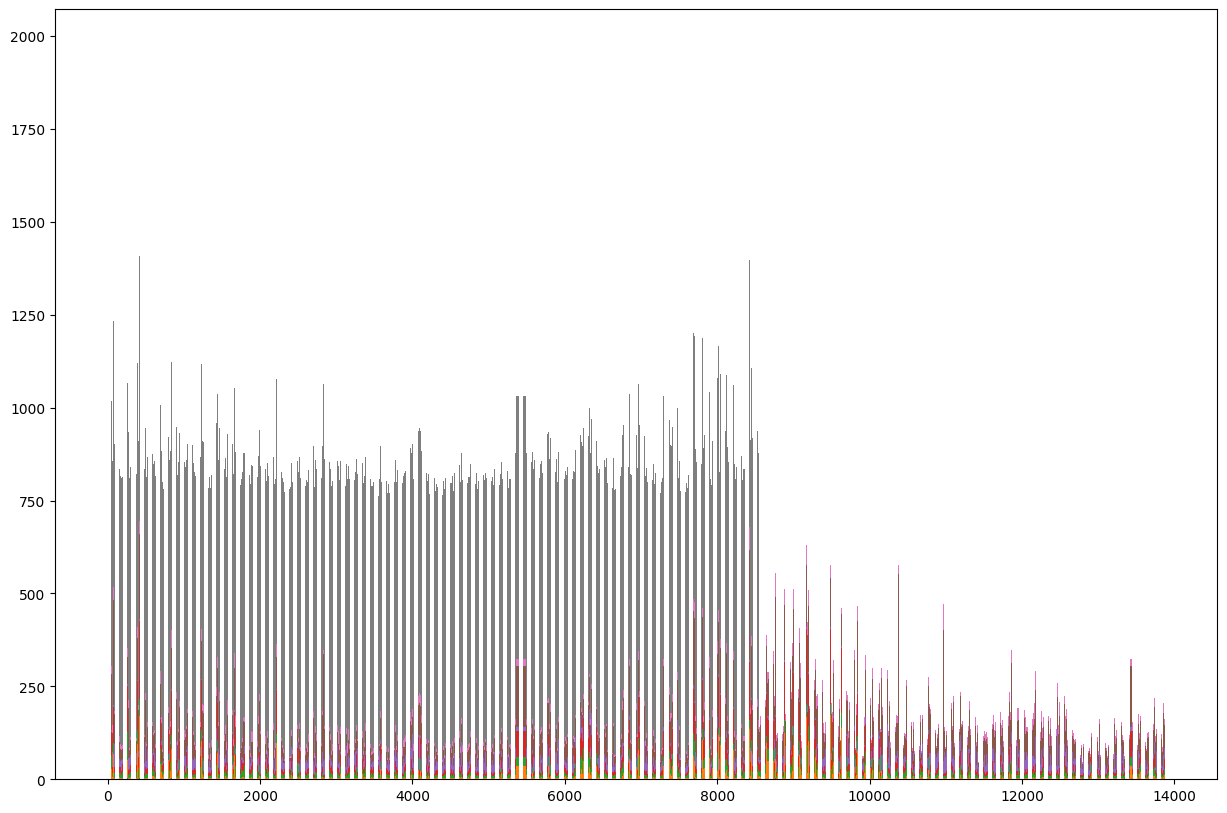

In [8]:
datos_Centro_no_norm = datos_Centro.drop(columns="FECHA")
print((datos_Centro_no_norm.isnull().sum().sum() / datos_Centro_no_norm.size) * 100)
datos_Sureste_no_norm = datos_Sureste.drop(columns="FECHA")
print((datos_Sureste_no_norm.isnull().sum().sum() / datos_Sureste_no_norm.size) * 100)
datos_Norte_no_norm = datos_Norte.drop(columns="FECHA")
print((datos_Norte_no_norm.isnull().sum().sum() / datos_Norte_no_norm.size) * 100)



## Normalidad de las variables

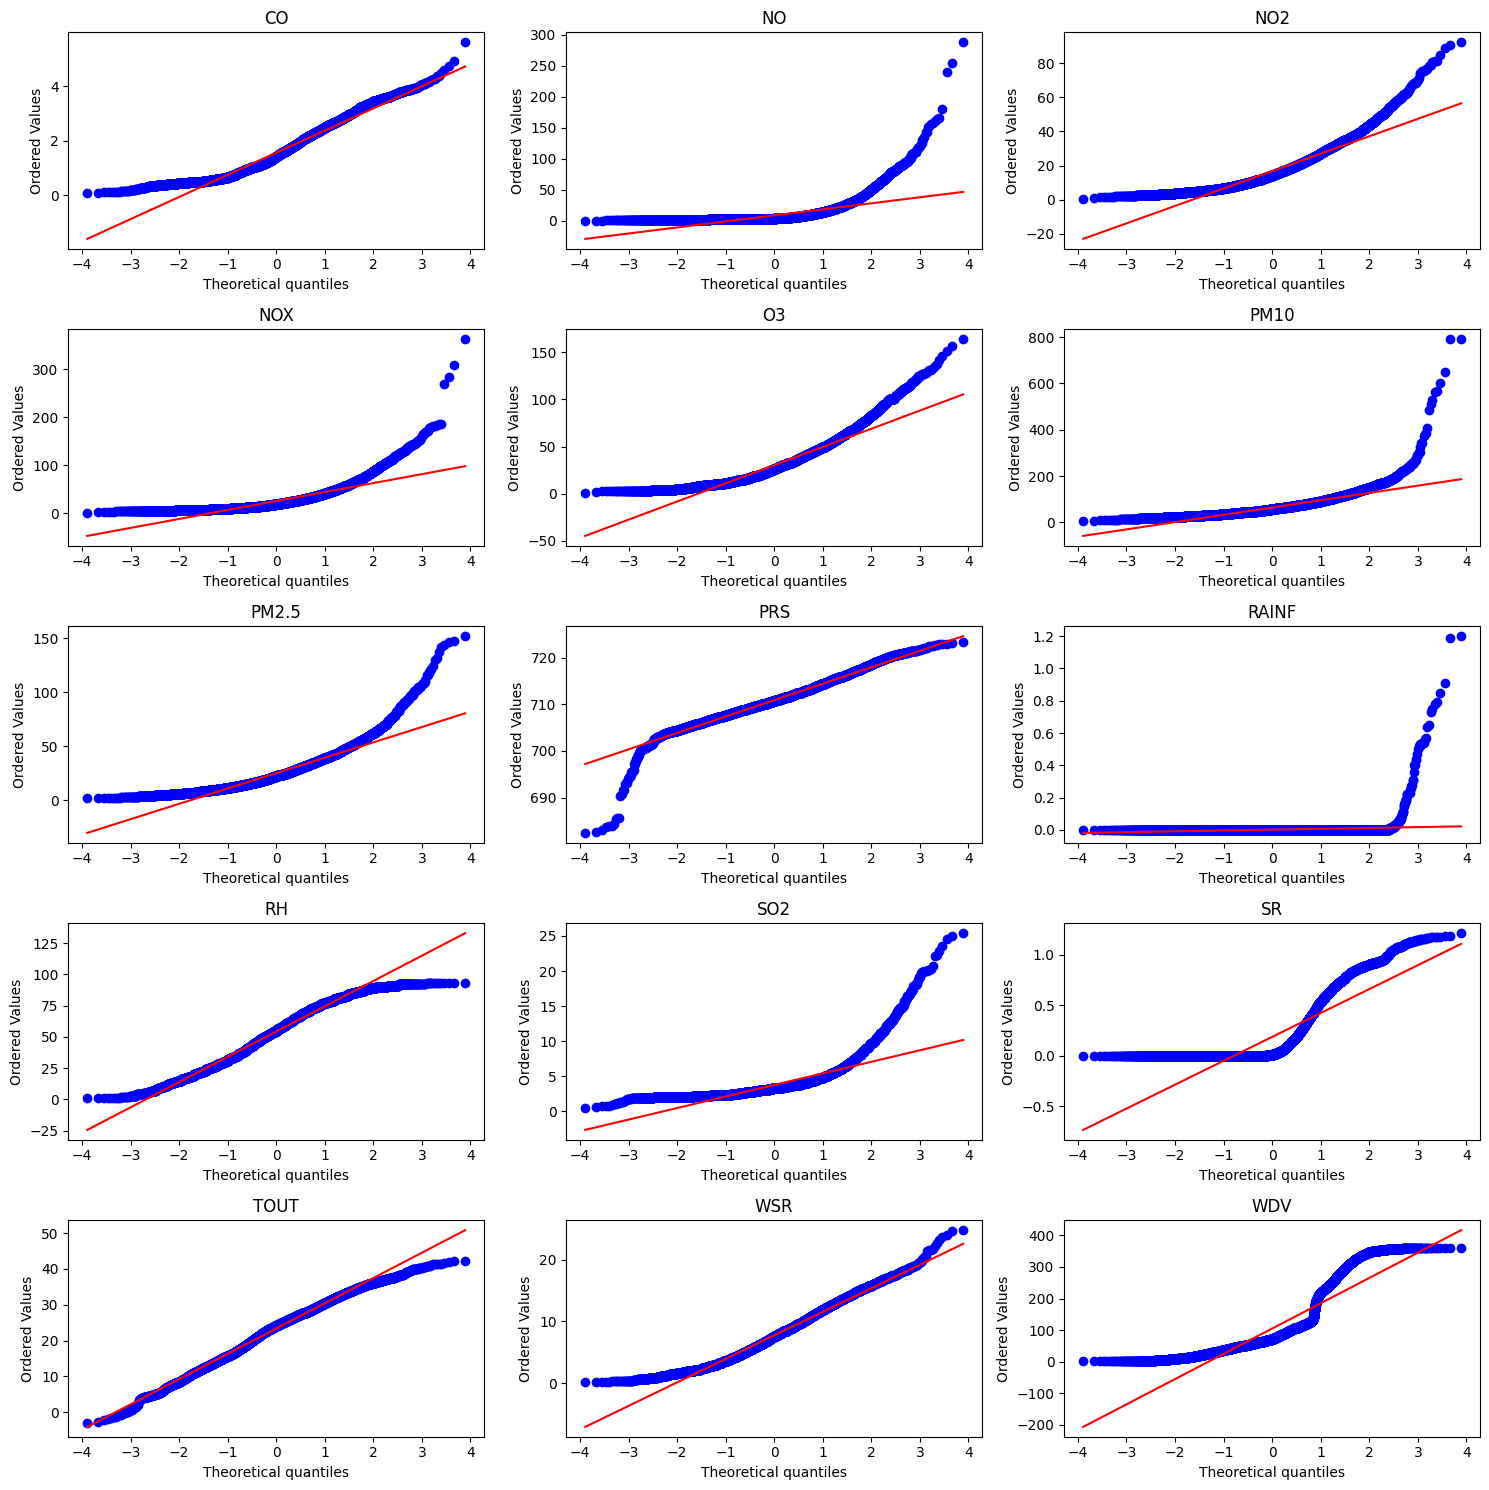

In [6]:
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(15,15))
axes=axes.flatten()
for ax,columns in zip(axes,datos_Centro_no_norm.columns):
    stats.probplot(datos_Centro_no_norm[columns], dist="norm", plot=ax)
    ax.set_title(columns)

plt.tight_layout()
plt.show()

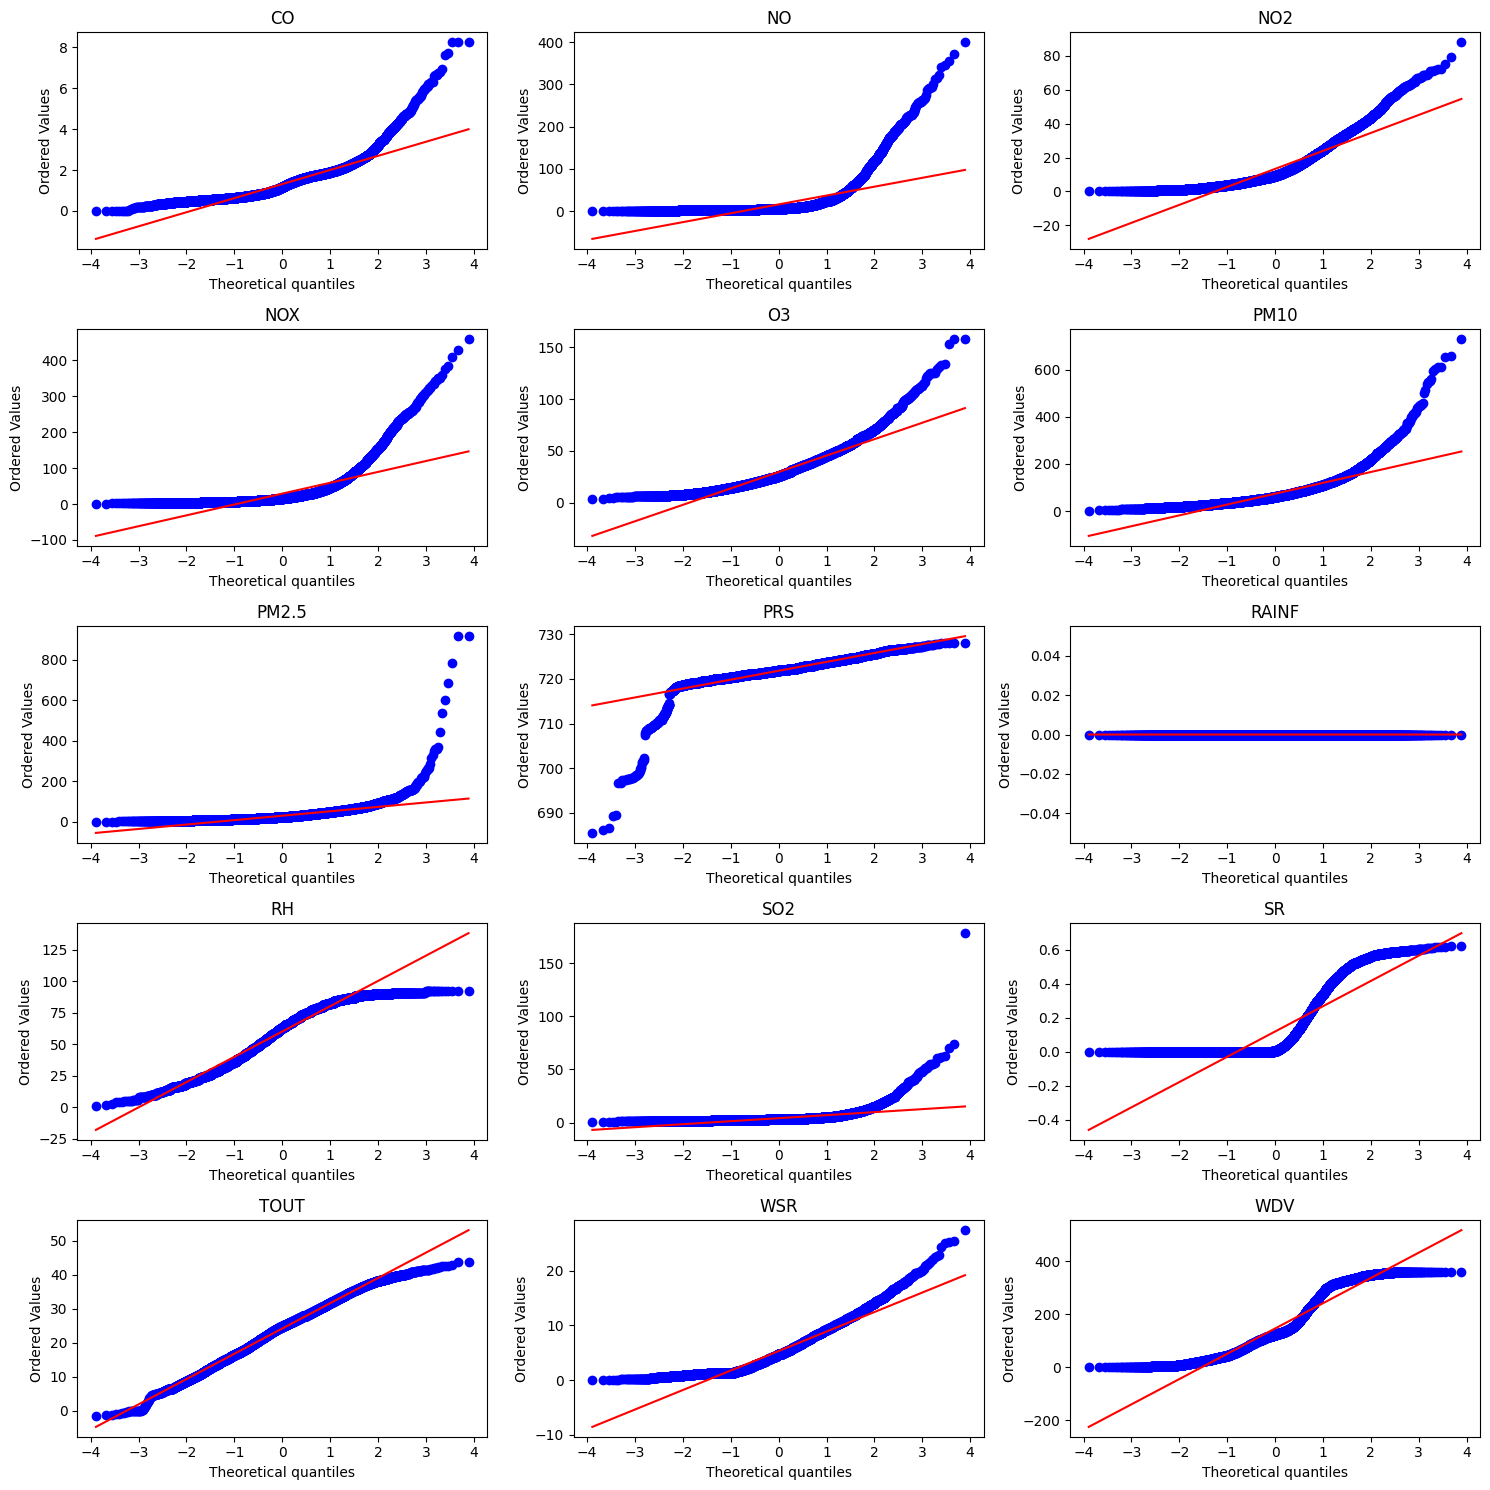

In [7]:
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(15,15))
axes=axes.flatten()
for ax,columns in zip(axes,datos_Sureste_no_norm.columns):
    stats.probplot(datos_Sureste_no_norm[columns], dist="norm", plot=ax)
    ax.set_title(columns)

plt.tight_layout()
plt.show()

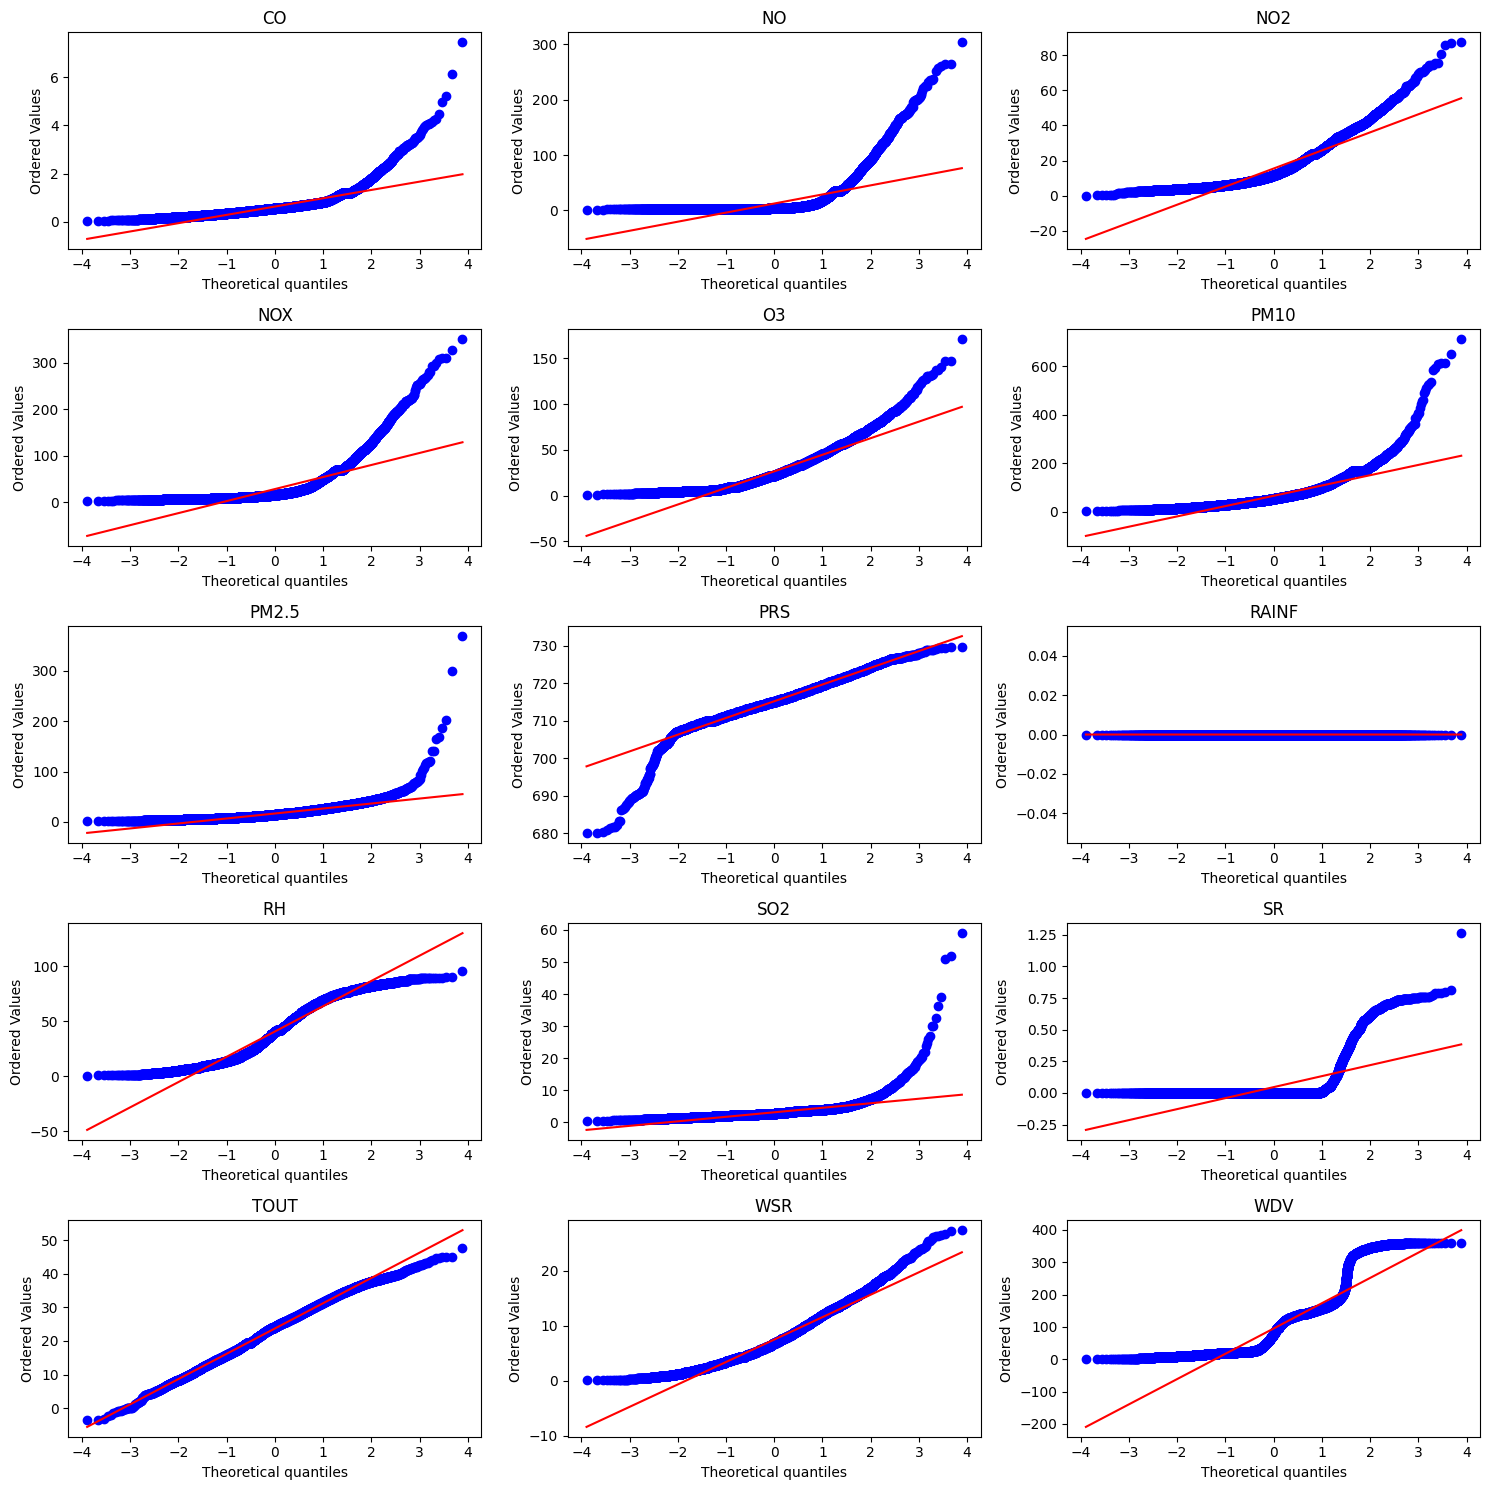

In [8]:
fig,axes = plt.subplots(ncols=3,nrows=5,figsize=(15,15))
axes=axes.flatten()
for ax,columns in zip(axes,datos_Norte_no_norm.columns):
    stats.probplot(datos_Norte_no_norm[columns], dist="norm", plot=ax)
    ax.set_title(columns)

plt.tight_layout()
plt.show()

In [9]:
datos_Centro_no_norm.to_csv('datos_Centro_no_norm.csv', index=False)
(datos_Centro_no_norm.isnull().sum().sum() /  datos_Centro_no_norm.size) * 100

datos_Sureste_no_norm.to_csv('datos_Sureste_no_norm.csv', index=False)
(datos_Sureste_no_norm.isnull().sum().sum() /  datos_Sureste_no_norm.size) * 100
datos_Norte_no_norm.to_csv('datos_Norte_no_norm.csv', index=False)
(datos_Norte_no_norm.isnull().sum().sum() /  datos_Norte_no_norm.size) * 100


0.0

# Crear variable nueva

In [10]:


def AirQClass(row):
    calidad = [] 
    for i in range(len(row)):
        if (row.loc[i,"CO"] <= 5) or ( row.loc[i,"NO2"] <=0.053) or (row.loc[i,"O3"]<=0.058) or (row.loc[i,"PM10"]<=45) or (row.loc[i,"PM2.5"]<=15) or (row.loc[i,"SO2"]<=0.035):
            color_= "verde"
        if (5<row.loc[i,"CO"]<=9 ) or ( 0.053<row.loc[i,"NO2"] <=0.106) or (0.058<row.loc[i,"O3"]<=0.090) or (45<row.loc[i,"PM10"]<=60) or (15<row.loc[i,"PM2.5"]<=33) or (0.035<row.loc[i,"SO2"]<=0.075):
            color_= "amarillo"
        if (9<row.loc[i,"CO"]<=12 ) or ( 0.106<row.loc[i,"NO2"] <=0.160) or (0.090<row.loc[i,"O3"]<=0.135) or (60<row.loc[i,"PM10"]<=132) or (33<row.loc[i,"PM2.5"]<=79) or (0.075<row.loc[i,"SO2"]<=0.185):
            color_= "naranja"
        if (12<row.loc[i,"CO"]<=16 ) or ( 0.160<row.loc[i,"NO2"] <=0.213) or (0.135<row.loc[i,"O3"]<=0.175) or (132<row.loc[i,"PM10"]<=213) or (79<row.loc[i,"PM2.5"]<=130) or (0.185<row.loc[i,"SO2"]<=0.304):
            color_= "rojo"
        if (row.loc[i,"CO"]>16 ) or ( row.loc[i,"NO2"] >0.213) or (row.loc[i,"O3"]>0.175) or (row.loc[i,"PM10"]>213) or (row.loc[i,"PM2.5"]>130) or (row.loc[i,"SO2"]>0.304):
            color_= "morado"

        calidad.append(color_)
    return calidad





In [11]:
# Estas tres son siempre mayores a 1, y siempre superan por mucho el morado
# Esto es debido a que estan en las unidaded ppb y los cambiamos a ppm
datos_Centro['NO2'] =datos_Centro['NO2']/1000
datos_Centro['O3']  =datos_Centro['O3']/1000
datos_Centro['SO2'] =datos_Centro['SO2']/1000
datos_Centro['NO']  =datos_Centro['NO']/1000
datos_Centro['NOX'] =datos_Centro['NOX']/1000



datos_Sureste['NO2'] =datos_Sureste['NO2']/1000
datos_Sureste['O3']  =datos_Sureste['O3']/1000
datos_Sureste['SO2'] =datos_Sureste['SO2']/1000
datos_Sureste['NO']  =datos_Sureste['NO']/1000
datos_Sureste['NOX'] =datos_Sureste['NOX']/1000


datos_Norte['NO2'] =datos_Norte['NO2']/1000
datos_Norte['O3']  =datos_Norte['O3']/1000
datos_Norte['SO2'] =datos_Norte['SO2']/1000
datos_Norte['NO']  =datos_Norte['NO']/1000
datos_Norte['NOX'] =datos_Norte['NOX']/1000

datos_Centro['calidad'] = AirQClass(datos_Centro)
datos_Sureste['calidad'] = AirQClass(datos_Sureste)
datos_Norte['calidad'] = AirQClass(datos_Norte)




dataframes = {
    'Centro': datos_Centro,
    'Norte': datos_Norte,
    'Sureste': datos_Sureste
}

for zona, datos in dataframes.items():
    print(f"Total de mediciones en zona {zona}: {len(datos)}")
    for color in ['verde', 'amarillo', 'naranja', 'rojo', 'morado']:
        conteo = datos['calidad'].value_counts().get(color, 0)
        print(f"Cantidad de '{color}': {conteo}")
    print("\n")





Total de mediciones en zona Centro: 13870
Cantidad de 'verde': 2790
Cantidad de 'amarillo': 4579
Cantidad de 'naranja': 5903
Cantidad de 'rojo': 539
Cantidad de 'morado': 59


Total de mediciones en zona Norte: 13870
Cantidad de 'verde': 4501
Cantidad de 'amarillo': 3514
Cantidad de 'naranja': 4632
Cantidad de 'rojo': 1033
Cantidad de 'morado': 190


Total de mediciones en zona Sureste: 13870
Cantidad de 'verde': 2627
Cantidad de 'amarillo': 4111
Cantidad de 'naranja': 5745
Cantidad de 'rojo': 1045
Cantidad de 'morado': 342




In [12]:
datos_Centro

,FECHA,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,calidad
0,2023-01-01 00:00:00,1.67,0.00410,0.0303,0.0345,0.009,118.0,94.12,718.4,0.0,45.0,0.0033,0.000,17.65,4.9,236.0,rojo
1,2023-01-01 01:00:00,1.70,0.00500,0.0289,0.0341,0.009,97.0,96.79,710.7,0.0,47.0,0.0034,0.001,17.12,3.4,336.0,rojo
2,2023-01-01 02:00:00,1.51,0.00430,0.0232,0.0277,0.011,103.0,81.23,710.4,0.0,46.0,0.0034,0.001,16.69,3.4,3.0,rojo
3,2023-01-01 03:00:00,1.30,0.00380,0.0209,0.0249,0.011,83.0,49.83,710.1,0.0,48.0,0.0032,0.001,15.99,2.6,315.0,naranja
4,2023-01-01 04:00:00,1.28,0.00460,0.0207,0.0255,0.009,65.0,40.19,710.2,0.0,55.0,0.0030,0.001,14.74,3.9,270.0,naranja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13865,2024-07-31 19:00:00,0.60,0.00250,0.0064,0.0092,0.028,77.0,32.42,710.7,0.0,47.0,0.0027,0.075,30.87,16.0,111.0,naranja
13866,2024-07-31 20:00:00,0.57,0.00230,0.0067,0.0092,0.023,89.0,31.45,710.8,0.0,49.0,0.0027,0.010,29.39,16.3,131.0,naranja
13867,2024-07-31 21:00:00,0.59,0.00190,0.0060,0.0082,0.023,90.0,31.75,711.2,0.0,50.0,0.0027,0.001,28.62,15.9,127.0,naranja
13868,2024-07-31 22:00:00,0.57,0.00190,0.0059,0.0080,0.022,85.0,33.73,711.7,0.0,50.0,0.0027,0.001,28.00,11.5,118.0,naranja


In [13]:
datos_Centro.loc[datos_Centro['calidad'] == 'rojo']

,FECHA,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,calidad
0,2023-01-01 00:00:00,1.67,0.0041,0.0303,0.0345,0.009,118.0,94.120,718.4,0.0,45.0,0.0033,0.000,17.65,4.9,236.0,rojo
1,2023-01-01 01:00:00,1.70,0.0050,0.0289,0.0341,0.009,97.0,96.790,710.7,0.0,47.0,0.0034,0.001,17.12,3.4,336.0,rojo
2,2023-01-01 02:00:00,1.51,0.0043,0.0232,0.0277,0.011,103.0,81.230,710.4,0.0,46.0,0.0034,0.001,16.69,3.4,3.0,rojo
6,2023-01-01 06:00:00,1.54,0.0070,0.0237,0.0308,0.007,147.0,108.130,710.2,0.0,55.0,0.0030,0.001,14.55,3.4,307.0,rojo
33,2023-01-02 09:00:00,1.44,0.0413,0.0285,0.0700,0.005,146.0,20.670,707.8,0.0,31.0,0.0054,0.041,20.81,5.8,182.0,rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12305,2024-05-27 19:00:00,1.00,0.0023,0.0076,0.0101,0.034,169.0,24.480,708.7,0.0,42.0,0.0021,0.041,29.58,13.5,138.0,rojo
12487,2024-06-04 09:00:00,1.67,0.0242,0.0341,0.0586,0.015,144.0,48.276,706.1,0.0,59.0,0.0024,0.490,29.61,6.3,84.0,rojo
12497,2024-06-04 19:00:00,0.87,0.0031,0.0141,0.0174,0.046,171.0,32.752,706.6,0.0,22.0,0.0033,0.051,32.20,9.1,262.0,rojo
12973,2024-06-24 15:00:00,0.54,0.0041,0.0109,0.0152,0.052,165.7,11.000,710.5,0.0,56.0,0.0023,1.125,29.09,9.1,62.0,rojo


Este de abajo es el modificado para que diga más info para la parte 1 de la exploración de datos

In [14]:
import statistics

elementos = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2"]


dataframes = {
    'datos_Centro': datos_Centro,
    'datos_Sureste': datos_Sureste,
    'datos_Norte': datos_Norte
}


for nombre, df in dataframes.items():
    print(f"Procesando DataFrame: {nombre}")
    for i in elementos:
        if i in df.columns:
            columna = round(df[i],4)
            media = round(columna.mean(),4)
            mediana = round(columna.median(),4)
            moda = round(statistics.mode(columna),4)
            rango = round(columna.max() - columna.min(),4)
            varianza = round(columna.var(),4)
            desviacion_estandar = round(columna.std(),4)
            
            
            print(f"{i}\nMedia: {media}, Mediana: {mediana}, Moda: {moda}\n"
                  f"Rango: {rango}, Varianza: {varianza}, Desviación Estándar: {desviacion_estandar}")
            
        else:
            print(f"No está: {i}")
    print("\n")

Procesando DataFrame: datos_Centro
CO
Media: 1.5641, Mediana: 1.42, Moda: 0.471
Rango: 5.56, Varianza: 0.6974, Desviación Estándar: 0.8351
NO
Media: 0.0088, Mediana: 0.0037, Moda: 0.0024
Rango: 0.2879, Varianza: 0.0002, Desviación Estándar: 0.0138
NO2
Media: 0.0167, Mediana: 0.0142, Moda: 0.0113
Rango: 0.0918, Varianza: 0.0001, Desviación Estándar: 0.0108
NOX
Media: 0.0256, Mediana: 0.0188, Moda: 0.014
Rango: 0.3614, Varianza: 0.0005, Desviación Estándar: 0.0215
O3
Media: 0.0303, Mediana: 0.026, Moda: 0.01
Rango: 0.163, Varianza: 0.0004, Desviación Estándar: 0.0203
PM10
Media: 64.1494, Mediana: 57.0, Moda: 46.0
Rango: 787.0, Varianza: 1265.7706, Desviación Estándar: 35.5777
PM2.5
Media: 25.038, Mediana: 22.06, Moda: 11.0
Rango: 150.0, Varianza: 226.3995, Desviación Estándar: 15.0466
SO2
Media: 0.0038, Mediana: 0.0033, Moda: 0.0023
Rango: 0.0249, Varianza: 0.0, Desviación Estándar: 0.002


Procesando DataFrame: datos_Sureste
CO
Media: 1.3162, Mediana: 1.16, Moda: 0.637
Rango: 8.25, Vari

Lo siguiente es lo mismo que el anterior, pero en dataframes para poder verlo y gardarlo

In [15]:
import pandas as pd
import statistics

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

elementos = ["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2"]

dataframes = {
    'datos_Centro': datos_Centro,
    'datos_Sureste': datos_Sureste,
    'datos_Norte': datos_Norte
}

resultados = {}

for nombre, df in dataframes.items():
    stats = {}
    for i in elementos:
        if i in df.columns:
            columna = round(df[i], 4)
            stats[i] = {
                'Media': round(columna.mean(), 4),
                'Mediana': round(columna.median(), 4),
                'Moda': round(statistics.mode(columna), 4),
                'Rango': round(columna.max() - columna.min(), 4),
                'Varianza': round(columna.var(), 4),
                'Desviación Estándar': round(columna.std(), 4)
            }
        else:
            stats[i] = {
                'Media': None,
                'Mediana': None,
                'Moda': None,
                'Rango': None,
                'Varianza': None,
                'Desviación Estándar': None
            }

    
    resultados[nombre] = pd.DataFrame(stats)

datos_Centro_stats = resultados['datos_Centro']
datos_Sureste_stats = resultados['datos_Sureste']
datos_Norte_stats = resultados['datos_Norte']

print("Datos Centro:")
print(datos_Centro_stats)
print("\nDatos Sureste:")
print(datos_Sureste_stats)
print("\nDatos Norte:")
print(datos_Norte_stats)


Datos Centro:
                         CO      NO     NO2     NOX      O3       PM10     PM2.5     SO2
Media                1.5641  0.0088  0.0167  0.0256  0.0303    64.1494   25.0380  0.0038
Mediana              1.4200  0.0037  0.0142  0.0188  0.0260    57.0000   22.0600  0.0033
Moda                 0.4710  0.0024  0.0113  0.0140  0.0100    46.0000   11.0000  0.0023
Rango                5.5600  0.2879  0.0918  0.3614  0.1630   787.0000  150.0000  0.0249
Varianza             0.6974  0.0002  0.0001  0.0005  0.0004  1265.7706  226.3995  0.0000
Desviación Estándar  0.8351  0.0138  0.0108  0.0215  0.0203    35.5777   15.0466  0.0020

Datos Sureste:
                         CO      NO     NO2     NOX      O3       PM10     PM2.5     SO2
Media                1.3162  0.0157  0.0133  0.0288  0.0295    73.4927   30.6502  0.0041
Mediana              1.1600  0.0053  0.0092  0.0153  0.0260    60.0000   24.0000  0.0030
Moda                 0.6370  0.0026  0.0081  0.0271  0.0240    52.0000   14.0000

In [16]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

elementos_clima = ["PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV"]

dataframes = {
    'datos_Centro': datos_Centro,
    'datos_Sureste': datos_Sureste,
    'datos_Norte': datos_Norte
}

resultados = {}

for nombre, df in dataframes.items():
    stats = {}
    for i in elementos_clima:
        if i in df.columns:
            columna = round(df[i], 4)
            stats[i] = {
                'Media': round(columna.mean(), 4),
                'Mediana': round(columna.median(), 4),
                'Moda': round(statistics.mode(columna), 4),
                'Rango': round(columna.max() - columna.min(), 4),
                'Varianza': round(columna.var(), 4),
                'Desviación Estándar': round(columna.std(), 4)
            }
        else:
            stats[i] = {
                'Media': None,
                'Mediana': None,
                'Moda': None,
                'Rango': None,
                'Varianza': None,
                'Desviación Estándar': None
            }

    
    resultados[nombre] = pd.DataFrame(stats)

clima_Centro_stats = resultados['datos_Centro']
clima_Sureste_stats = resultados['datos_Sureste']
clima_Norte_stats = resultados['datos_Norte']

print("Datos Centro:")
print(clima_Centro_stats)
print("\nDatos Sureste:")
print(clima_Sureste_stats)
print("\nDatos Norte:")
print(clima_Norte_stats)

Datos Centro:
                          PRS   RAINF        RH      SR     TOUT      WSR        WDV
Media                710.9360  0.0017   54.3266  0.1864  23.3532   7.7404   104.9049
Mediana              710.8000  0.0000   55.0000  0.0090  24.1250   7.6000    72.0000
Moda                 709.7000  0.0000   66.0000  0.0010  27.8020   8.4400    63.5000
Rango                 41.1000  1.2000   92.0000  1.2160  45.2800  24.7000   359.0000
Varianza              12.7540  0.0009  416.9015  0.0796  50.3335  14.8430  7903.8801
Desviación Estándar    3.5713  0.0299   20.4182  0.2822   7.0946   3.8527    88.9038

Datos Sureste:
                          PRS  RAINF        RH      SR     TOUT      WSR        WDV
Media                721.8350    0.0   60.1357  0.1197  24.2062   5.3288   145.7582
Mediana              721.8000    0.0   63.0000  0.0060  24.8000   4.7000   123.0000
Moda                 721.3000    0.0   65.0000 -0.0000  28.0070   1.4000   129.0000
Rango                 42.5000    0.0   

MAPA DE CALOR

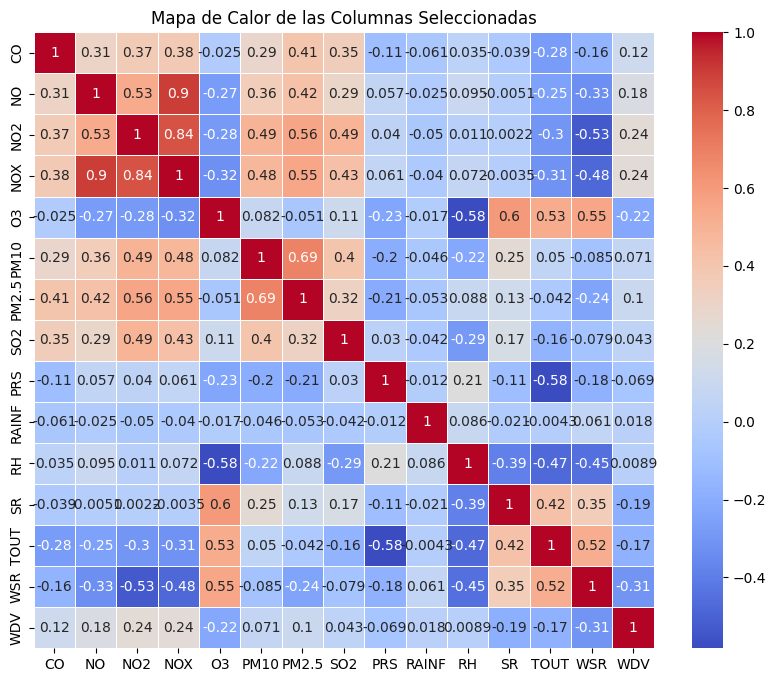

In [17]:
elementos = datos_Centro[["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2","PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV"]]
plt.figure(figsize=(10, 8))
sns.heatmap(elementos.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de las Columnas Seleccionadas')
plt.show()

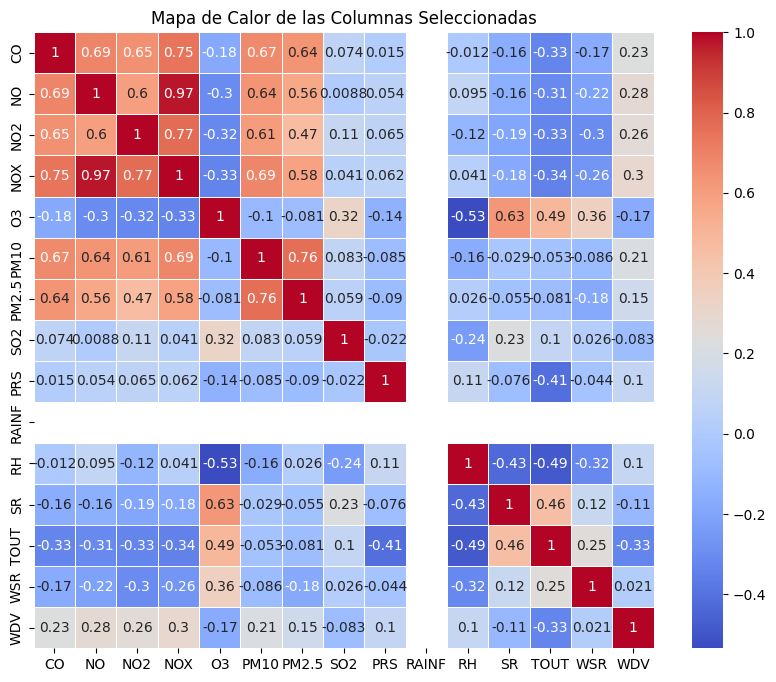

In [18]:
elementos = datos_Sureste[["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2","PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV"]]
plt.figure(figsize=(10, 8))
sns.heatmap(elementos.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de las Columnas Seleccionadas')
plt.show()

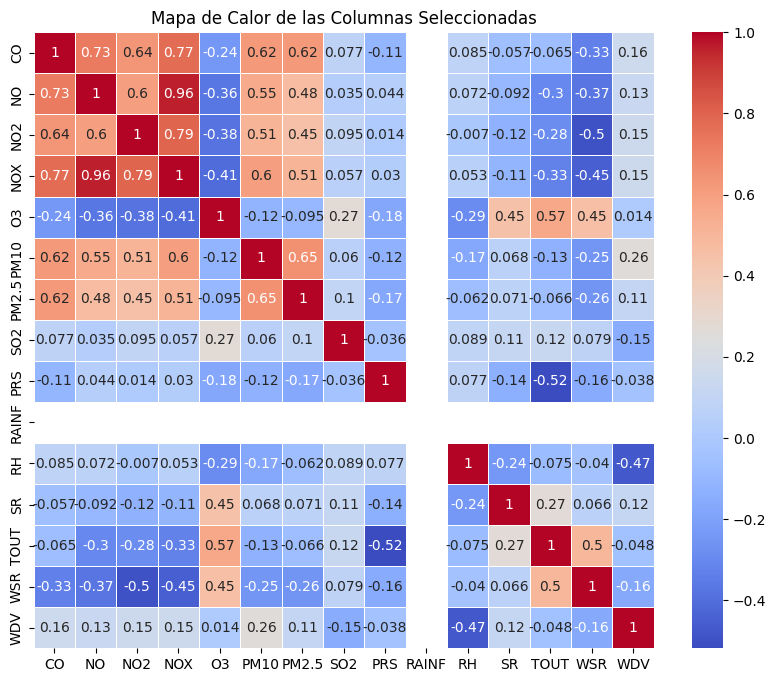

In [19]:
elementos = datos_Norte[["CO", "NO", "NO2", "NOX", "O3", "PM10", "PM2.5", "SO2","PRS", "RAINF", "RH", "SR", "TOUT", "WSR", "WDV"]]
plt.figure(figsize=(10, 8))
sns.heatmap(elementos.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de las Columnas Seleccionadas')
plt.show()

DUMMIES

In [20]:


# Usamos pd.get_dummies() para crear las columnas binarias
datos_Centro_dummies = pd.get_dummies(datos_Centro['calidad'], prefix='calidad')
# Convertimos los valores booleanos a enteros (0 y 1)
datos_Centro_dummies = datos_Centro_dummies.astype(int)
# Unimos las nuevas columnas al dataframe original
datos_Centro = pd.concat([datos_Centro, datos_Centro_dummies], axis=1)





# Usamos pd.get_dummies() para crear las columnas binarias
datos_Sureste_dummies = pd.get_dummies(datos_Sureste['calidad'], prefix='calidad')
# Convertimos los valores booleanos a enteros (0 y 1)
datos_Sureste_dummies = datos_Sureste_dummies.astype(int)
# Unimos las nuevas columnas al dataframe original
datos_Sureste = pd.concat([datos_Sureste, datos_Sureste_dummies], axis=1)





# Usamos pd.get_dummies() para crear las columnas binarias
datos_Norte_dummies = pd.get_dummies(datos_Norte['calidad'], prefix='calidad')
# Convertimos los valores booleanos a enteros (0 y 1)
datos_Norte_dummies = datos_Norte_dummies.astype(int)
# Unimos las nuevas columnas al dataframe original
datos_Norte = pd.concat([datos_Norte, datos_Norte_dummies], axis=1)



In [21]:
datos_Centro.head()

,FECHA,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,calidad,calidad_amarillo,calidad_morado,calidad_naranja,calidad_rojo,calidad_verde
0,2023-01-01 00:00:00,1.67,0.0041,0.0303,0.0345,0.009,118.0,94.12,718.4,0.0,45.0,0.0033,0.000,17.65,4.9,236.0,rojo,0,0,0,1,0
1,2023-01-01 01:00:00,1.70,0.0050,0.0289,0.0341,0.009,97.0,96.79,710.7,0.0,47.0,0.0034,0.001,17.12,3.4,336.0,rojo,0,0,0,1,0
2,2023-01-01 02:00:00,1.51,0.0043,0.0232,0.0277,0.011,103.0,81.23,710.4,0.0,46.0,0.0034,0.001,16.69,3.4,3.0,rojo,0,0,0,1,0
3,2023-01-01 03:00:00,1.30,0.0038,0.0209,0.0249,0.011,83.0,49.83,710.1,0.0,48.0,0.0032,0.001,15.99,2.6,315.0,naranja,0,0,1,0,0
4,2023-01-01 04:00:00,1.28,0.0046,0.0207,0.0255,0.009,65.0,40.19,710.2,0.0,55.0,0.0030,0.001,14.74,3.9,270.0,naranja,0,0,1,0,0


In [22]:
datos_Sureste.head()

,FECHA,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,calidad,calidad_amarillo,calidad_morado,calidad_naranja,calidad_rojo,calidad_verde
0,2023-01-01 00:00:00,2.91,0.0366,0.0336,0.0702,0.010,100.0,51.3,714.1,0.0,57.0,0.0030,-1.387779e-17,18.64,1.4,55.0,naranja,0,0,1,0,0
1,2023-01-01 01:00:00,4.80,0.0943,0.0327,0.1270,0.013,198.0,92.7,722.0,0.0,68.0,0.0039,-1.387779e-17,17.34,0.5,14.0,rojo,0,0,0,1,0
2,2023-01-01 02:00:00,6.58,0.1440,0.0296,0.1736,0.013,436.0,313.4,721.9,0.0,70.0,0.0050,-1.387779e-17,16.60,1.3,227.0,morado,0,1,0,0,0
3,2023-01-01 03:00:00,6.95,0.1732,0.0274,0.2006,0.011,558.0,348.7,721.7,0.0,73.0,0.0051,-1.387779e-17,15.81,1.4,237.0,morado,0,1,0,0,0
4,2023-01-01 04:00:00,6.77,0.1517,0.0236,0.1753,0.012,551.0,368.4,721.7,0.0,75.0,0.0047,-1.387779e-17,15.00,1.4,234.0,morado,0,1,0,0,0


In [23]:
datos_Norte.head()

,FECHA,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDV,calidad,calidad_amarillo,calidad_morado,calidad_naranja,calidad_rojo,calidad_verde
0,2023-01-01 00:00:00,7.46,0.1304,0.0432,0.1735,0.012,522.0,369.16,715.7,0.0,76.5,0.0042,0.0,17.05,3.8,18.0,morado,0,1,0,0,0
1,2023-01-01 01:00:00,4.16,0.0562,0.0411,0.0972,0.009,712.0,299.29,715.5,0.0,79.0,0.0040,0.0,15.87,4.5,15.0,morado,0,1,0,0,0
2,2023-01-01 02:00:00,3.19,0.0424,0.0379,0.0802,0.007,586.0,201.58,715.1,0.0,77.7,0.0038,0.0,15.41,4.8,28.0,morado,0,1,0,0,0
3,2023-01-01 03:00:00,3.10,0.0461,0.0349,0.0809,0.007,406.0,186.32,714.9,0.0,77.6,0.0037,0.0,14.58,2.8,26.0,morado,0,1,0,0,0
4,2023-01-01 04:00:00,3.20,0.0592,0.0335,0.0927,0.007,340.0,168.50,714.9,0.0,77.6,0.0038,0.0,13.84,4.1,28.0,morado,0,1,0,0,0


/tmp/ipykernel_292/386125061.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='calidad', y='Frecuencia', data=frecuencia, palette='viridis',order=orden_categorias)


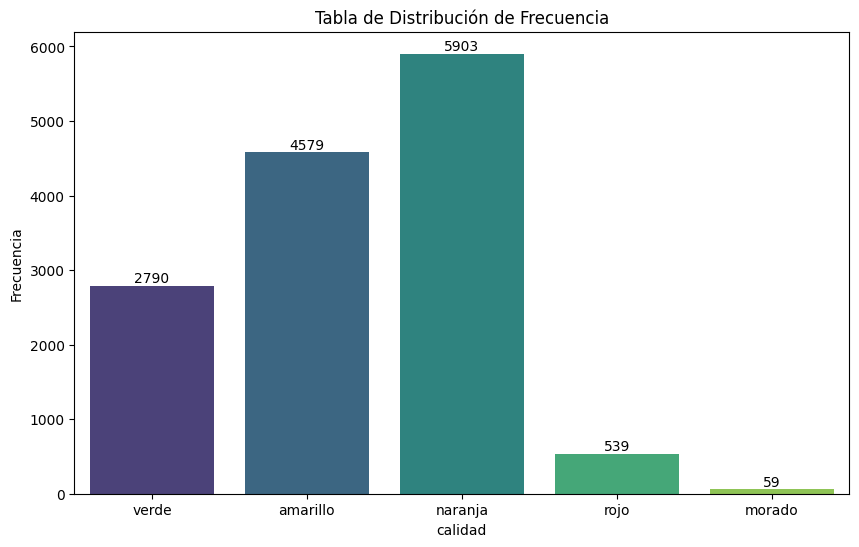

In [24]:
# Crear la tabla de distribución de frecuencia
frecuencia = datos_Centro['calidad'].value_counts().reset_index()
frecuencia.columns = ['calidad', 'Frecuencia']
frecuencia
# Graficar la tabla de frecuencia
orden_categorias = ['verde', 'amarillo', 'naranja', 'rojo', 'morado']
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x='calidad', y='Frecuencia', data=frecuencia, palette='viridis',order=orden_categorias)
# Añadir los valores encima de cada barra
for container in barplot.containers:
    barplot.bar_label(container)
plt.title('Tabla de Distribución de Frecuencia')
plt.xlabel('calidad')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_292/1201427050.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='calidad', y='Frecuencia', data=frecuencia, palette='viridis',order=orden_categorias)


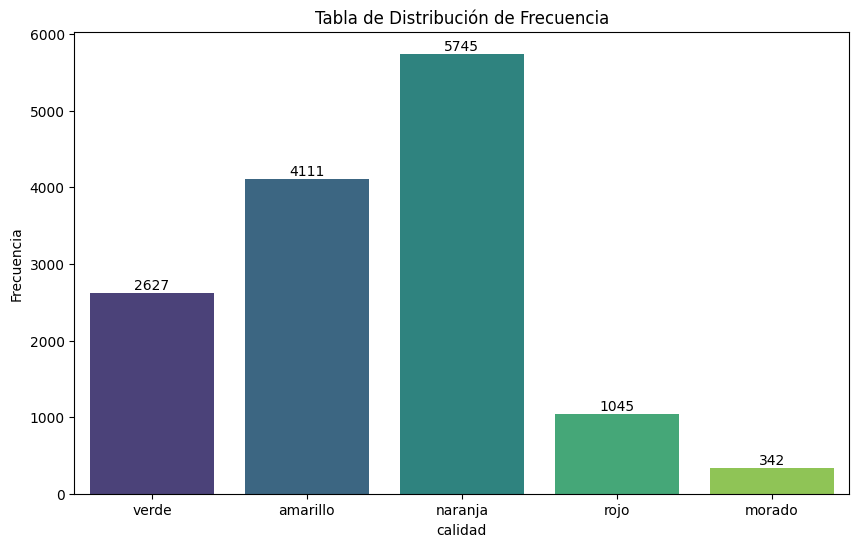

In [25]:
# Crear la tabla de distribución de frecuencia
frecuencia = datos_Sureste['calidad'].value_counts().reset_index()
frecuencia.columns = ['calidad', 'Frecuencia']
frecuencia
# Graficar la tabla de frecuencia
orden_categorias = ['verde', 'amarillo', 'naranja', 'rojo', 'morado']
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x='calidad', y='Frecuencia', data=frecuencia, palette='viridis',order=orden_categorias)
# Añadir los valores encima de cada barra
for container in barplot.containers:
    barplot.bar_label(container)
plt.title('Tabla de Distribución de Frecuencia')
plt.xlabel('calidad')
plt.ylabel('Frecuencia')
plt.show()

/tmp/ipykernel_292/1073315712.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x='calidad', y='Frecuencia', data=frecuencia, palette='viridis',order=orden_categorias)


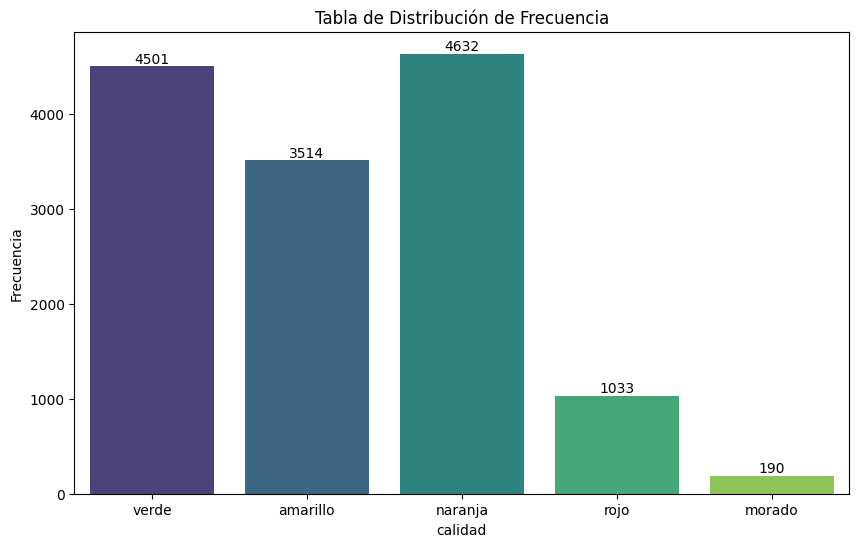

In [26]:
# Crear la tabla de distribución de frecuencia
frecuencia = datos_Norte['calidad'].value_counts().reset_index()
frecuencia.columns = ['calidad', 'Frecuencia']
frecuencia
# Graficar la tabla de frecuencia
orden_categorias = ['verde', 'amarillo', 'naranja', 'rojo', 'morado']
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x='calidad', y='Frecuencia', data=frecuencia, palette='viridis',order=orden_categorias)
# Añadir los valores encima de cada barra
for container in barplot.containers:
    barplot.bar_label(container)
plt.title('Tabla de Distribución de Frecuencia')
plt.xlabel('calidad')
plt.ylabel('Frecuencia')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4ae726bf-3957-4f74-acaf-d9fc1a75bf4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>